# Neutrino Spectra

This notebook illustrates how the decay spectra into neutrinos are computed.

In [1]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
# Common style-sheet
plt.style.use("./style.mplstyle")

## Muon Decay into Neutrinos

### Rest Frame Spectrum


The neutrino spectrum from the decay of a muon comes from the process $\mu^{\pm} \to e^{\pm} + \nu_{e} + \nu_{\mu}$. 
There are two diagrams contributing to this process: one with a charged goldstone exchange and another with a $W$ exchange:

<p align="center">
  <img src="./images/muon_decay_e_nu_nu.png"/>
</p>

The squared matrix element for this process is given by:
\begin{align*}
    \left|\mathcal{M}\right|^2 = 16 G_{F}^{2}(m_{\mu}^{2} - s)(s - m_{e}^{2}) + \mathcal{O}(M_{W}^{-6})
\end{align*}
In this expression, $s = (p_{\mu} - p_{\nu_{e}})^2$. Note that the total width can be computed by performing the following integrations:
\begin{align*}
    \Gamma = \frac{1}{2m_{\mu}} 
    \int_{s_{\mathrm{min}}}^{s_{\mathrm{max}}}
    \int_{t_{\mathrm{min}}(s)}^{t_{\mathrm{max}}(s)}
    \frac{ds dt}{16 m_{\mu}^2 (2\pi)^3}\left|\mathcal{M}\right|^2
\end{align*}
where $t = (p_{\mu} - p_{\nu_{\mu}})^2$ and the integration bounds are:
\begin{align*}
    s_{\mathrm{min}} &= m_{e}^2 & s_{\mathrm{max}} &= m_{\mu}^2\\
    t_{\mathrm{min}}(s) &= m_{e}^{2} + m_{\mu}^2 - s &
    t_{\mathrm{max}}(s) &= \frac{m_{e}^{2}m_{\mu}^2}{s}
\end{align*}
To obtain the differential electron-neutrino spectrum $\frac{d\Gamma}{ds}$, we integrate over $t$. The result is:
\begin{align*}
    \frac{d\Gamma}{ds} = \frac{G_{F}^{2}(s - m_{\mu}^2)^2 (s - m_{\mu}^2r^2)}{16 m_{\mu}^3 \pi^3 s}
\end{align*}
where we've defined $r = m_{e}/m_{\mu}$. Performing the integration over $s$ gives us the total width
\begin{align*}
    \Gamma = 
    \frac{G_{F}^2m_{\mu}^{5}}{192\pi^3} \left( 1 - 8r^2 + 8 r^6 - r^8 - 12 r^4\log(r^2) \right)
\end{align*}
Neglecting the \(r\) terms gives us the well-known result for the muon decay width. Let us denote 
$F(r) = 1 - 8r^2 + 8 r^6 - r^8 - 12 r^4\log(r^2)$ which one can neglect if they wish as $F(r)\approx 1$.
Lastly, to obtain the energy spectrum $dN/dE_{\nu_{e}}$ we compute:
\begin{align*}
    \frac{1}{\Gamma} \frac{d\Gamma}{ds} = 
    \frac{dN}{ds} = 
    \frac{dE_{\nu_{e}}}{ds}\frac{dN}{dE_{\nu_{e}}} =
    \frac{1}{2m_{\mu}}\frac{dN}{dE_{\nu_{e}}}
\end{align*}
where we've used $s = m_{\mu}^2(1 - 2E_{\nu_{e}}/m_{\mu})$. Putting everything together, we find:
\begin{align*}
    \frac{dN}{dE_{\nu_{e}}} = 
    \frac{24}{F(r)m_{\mu}}
    \frac{x^{2}}{1 - x}
    \left(1-r^2 - x\right)^{2}
\end{align*}
where $x = 2E_{\nu_{e}}/m_{\mu}$. For the purpose of plotting, it is often desirable to use $dN/dx$ rather than $dN/dE$ 
so mass-scales don't play a role. The expression for $dN/dx$ is:
\begin{align*}
    \frac{dN}{dx} = 
    \frac{dE_{\nu_{e}}}{dx} \frac{dN}{dE_{\nu_{e}}} = 
    \frac{m_{\mu}}{2} \frac{dN}{dE_{\nu_{e}}} = 
    \frac{12}{F(r)}
    \frac{x^{2}}{1 - x}
    \left(1-r^2 - x\right)^{2}
\end{align*}
Additionally, note that the bounds on $x$ are: $0 \leq x \leq 1 - r^2$. 


To compute the spectrum of muon neutrinos, we repeat the above but compute $dN/dt$ instead. The results are:
\begin{align*}
    \frac{dN}{dE_{\nu{\mu}}} = 
    \frac{16}{F(r)m_{\mu}^{4}}
    \frac{E_{\nu_{\mu}}^{2}}{(m_{\mu} - 2E_{\nu_{\mu}})^3}
    \left(m_{\mu}(1-r^2) - 2E_{\nu_{\mu}}\right)^{2}
    \left(8E_{\nu_{\mu}}^{2} + 3 m_{\mu}^2(1+r^2) - 2E_{\nu_{\mu}}m_{\mu}(5+r^2)\right)
\end{align*}
and
\begin{align*}
    \frac{dN_{\nu_{\mu}}}{dx} = 
    \frac{2}{F(r)}
    \frac{x^{2}}{(1 - x)^3}
    \left(1-r^2 - x\right)^{2}
    \left(3 + r^2(3-x) - x(5-2x)\right)
\end{align*}

Now that we have the muon decay spectrum into neutrinos in the muon rest frame,
let's take a look at what it looks like. Additionally, let's compare to the built-in `hazma` results. 
For reference, below is how the `hazma` built-in function is used.

To import, use:
```python
# Importing muon decay spectrum into neutrinos
>>> from hazma.neutrino_spectra import muon
```

The documentation for the `hazma.neutrino_spectra.muon` function:
```python
# Documentation:
def muon(
    neutrino_energies: Union[float, NDArray[np.float64]], 
    muon_energy: float, 
    flavor: Optional[str] = None
) -> Union[float, Tuple[float, float, float], NDArray[np.float64]]:
    """
    Returns the neutrino spectrum from muon decay.

    Parameters
    ----------
    neutrino_energies : float or numpy.ndarray
        Energy(ies) of the neutrinos.
    muon_energy : float
        Energy of the muon.
    flavor : str, optional
        Flavor of neutrino to compute spectrum for. If None, spectrum for all
        flavors are return. Options are "e", "mu" or "tau".

    Returns
    -------
    dnde : float or numpy.array
        The neutrino spectrum. If flavor is None, the result has the shape
        (3, len(neutrino_energies)). Otherwise, has the shape (len(neutrino_energies),).
    """
```

Using the function to compute spectra:
```python
# Get spectra into electron-, muon- and tau-neutrinos given a signle neutrino energy:
>>> from hazma.parameters import muon_mass as mmu
>>> from hazma.neutrino_spectra import muon
>>> enu = mmu / 3.0
>>> dnde = muon(enu, mmu)
(0.033653003859705766, 0.033653003859705766, 0.0)

# Get spectra into electron-neutrinos only:
>>> from hazma.parameters import muon_mass as mmu
>>> from hazma.neutrino_spectra import muon
>>> enu = mmu / 3.0
>>> dnde = muon(enu, mmu, flavor="e")
0.033653003859705766

# Get spectra into electron-neutrinos only for an array of neutrino energies:
>>> from hazma.parameters import muon_mass as mmu
>>> from hazma.parameters import electron_mass as me
>>> from hazma.neutrino_spectra import muon
>>> enu_max = (mmu**2 - me**2) / (2.0 * mmu)
>>> enus = np.geomspace(enu_max*1e-4, enu_max, 10)
>>> dnde = muon(enus, mmu, flavor="e")
array([2.27145686e-09, 1.75839302e-08, 1.36078435e-07, 1.05215059e-06,
       8.11506604e-06, 6.21565108e-05, 4.66702118e-04, 3.29996642e-03,
       1.87954577e-02, 0.00000000e+00])

# Get spectra into all neutrino flavorsonly for an array of neutrino energies:
>>> from hazma.parameters import muon_mass as mmu
>>> from hazma.parameters import electron_mass as me
>>> from hazma.neutrino_spectra import muon
>>> enu_max = (mmu**2 - me**2) / (2.0 * mmu)
>>> enus = np.geomspace(enu_max*1e-4, enu_max, 10)
>>> dnde = muon(enus, mmu)
array([[2.27145686e-09, 2.26941230e-07, 2.24896666e-05, 2.04451032e-03,
        0.00000000e+00], # electron-neutrino
       [2.27145686e-09, 2.26941230e-07, 2.24896666e-05, 2.04451032e-03,
        0.00000000e+00], # muon-neutrino
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00] # tau-neutrino
])
```

/tmp/ipykernel_89196/549920769.py:36: RuntimeWarning: divide by zero encountered in true_divide
  pre * x**2 / (1-x) * (1 - r**2 - x)**2,
/tmp/ipykernel_89196/549920769.py:41: RuntimeWarning: divide by zero encountered in true_divide
  (2*x**2*(-1 + r**2 + x)**2*(-3 + r**2*(-3 + x) + (5 - 2*x)*x))/(electron_mass_factor*(-1 + x)**3),


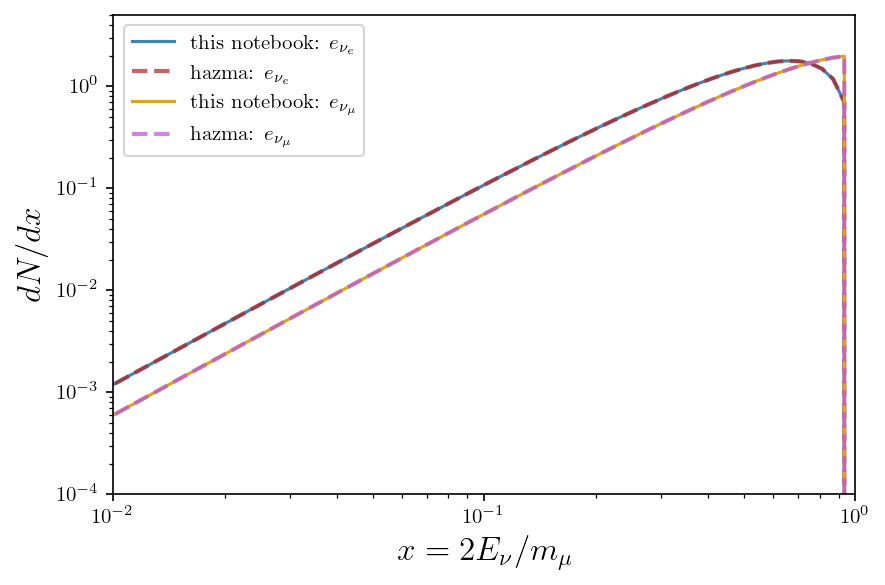

In [2]:
import numpy as np
from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from matplotlib.lines import Line2D

# `hazma` built-in spectra
from hazma.neutrino_spectra import muon as hazma_dnde_muon_neutrino_spectrum_rest_frame

# Ratio of electron mass to muon mass
r: float = me / mmu

# Additional factor to muon width containing the electron mass
electron_mass_factor: float = 1.0 - 8 * r**2 + 8.0 * r**6 - r**8 - 12.0 * r**4 * np.log(r**2)

def dndx_muon_neutrino_spectrum_rest_frame(x):
    """Compute the muon decay spectrum into neutrinos in the muon rest-frame.

    Parameters
    ----------
    x : float or np.ndarray
        Scaleless neutrino energy (2 neutrino-energy / muon_mass).

    Returns
    -------
    dndx: float or np.ndarray
        Neutrino spectrum.
    """
    pre = 12.0 / electron_mass_factor
    xmin = 0.0
    xmax = 1.0 - r**2

    if isinstance(x, np.ndarray):
        res = np.zeros((2, len(x)), dtype=np.float_)
        res[0] = np.where(
            np.bitwise_and(xmin < x, x < xmax), 
            pre * x**2 / (1-x) * (1 - r**2 - x)**2,
            0.0
        )
        res[1] = np.where(
            np.bitwise_and(xmin < x, x < xmax), 
            (2*x**2*(-1 + r**2 + x)**2*(-3 + r**2*(-3 + x) + (5 - 2*x)*x))/(electron_mass_factor*(-1 + x)**3),
            0.0
        )
        return res
    else:
        if xmin < x and x < xmax:
            dndxe =  pre * x**2 / (1-x) * (1 - r**2 - x)**2
            dndxm =  (2*x**2*(-1 + r**2 + x)**2*(-3 + r**2*(-3 + x) + (5 - 2*x)*x))/(electron_mass_factor*(-1 + x)**3),
            return (dndxe, dndxm)
        else:
            return (0.0, 0.0)


xs = np.geomspace(1e-6, 1.0, 200)
dndx = dndx_muon_neutrino_spectrum_rest_frame(xs)
hazma_dndx = mmu / 2.0 * hazma_dnde_muon_neutrino_spectrum_rest_frame(mmu * xs / 2.0, mmu)

plt.figure(dpi=150)
plt.plot(xs, dndx[0], label=r"this notebook: $e_{\nu_{e}}$")
plt.plot(xs, hazma_dndx[0], ls="--", alpha=0.7, label=r"hazma: $e_{\nu_{e}}$", lw=2)
plt.plot(xs, dndx[1], label=r"this notebook: $e_{\nu_{\mu}}$")
plt.plot(xs, hazma_dndx[1], ls="--", alpha=0.7, label=r"hazma: $e_{\nu_{\mu}}$", lw=2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-2, 1.0)
plt.ylim(1e-4, 5.0)
plt.ylabel(r"$dN/dx$", fontdict={"size": 16})
plt.xlabel(r"$x = 2 E_{\nu}/m_{\mu}$", fontdict={"size": 16})


plt.legend()
plt.tight_layout()

### Boosted Muon Spectrum

In general, we are more interested in the spectrum for a muon with energy $E_{\mu} > m_{\mu}$. 
In order to compute the spectrum for a muon with a non-zero kinetic energy, we need to compute
the following integral:
\begin{align*}
    \frac{dN}{dE_{\nu}} = \frac{1}{2\gamma}\int_{-1}^{1} \frac{dz}{1-\beta z} \frac{dN}{dE_{\nu,R}}(\gamma E_{\nu}(1-\beta z))
\end{align*}
In general, such an integral needs to be computed numerically. However, in our present case, we can do the integral analytically.
First, we swich from $dN/dE$ to $dN/dx$ with $x = 2E_{\nu}/E_{\mu}$ and the rest-frame version $x_{R} = 2E_{\nu}/m_{\nu}$.
Recall that
\begin{align*}
    \frac{dN}{dx} = \frac{dE_{\nu}}{dx} \frac{dN}{dE_{\nu}}
\end{align*}
which yeilds:
\begin{align*}
    \frac{dN}{dx} &= \frac{E_{\nu}}{2} \frac{dN}{dE_{\nu}}, &
    \frac{dN}{dx_{R}} &= \frac{m_{\nu}}{2} \frac{dN}{dE_{\nu,R}}
\end{align*}
Thus, the integral we will compute is
\begin{align*}
    \frac{dN}{dx} = \frac{E_{\nu}}{2}\frac{2}{m_{\mu}}\frac{1}{2\gamma}\int_{-1}^{z_{+}} \frac{dz}{1-\beta z} \frac{dN}{dx_{R}}(x_{R})
    = \frac{1}{2}\int_{-1}^{1} \frac{dz}{1-\beta z} \frac{dN}{dx_{R}}(\gamma^2 x (1-\beta z))
\end{align*}
Next, we change integration variables to $w = 1-\beta z$. We need to be a bit careful about the integration
bounds. We know that $0 \leq x_{R} \leq 1 - r^2$ which in turn implies that $0 \leq \gamma^2 x w \leq 1 - r^2$.
The boosted $x$ has a range between $0 \leq x \leq (1-r^2)(1+\beta)$. We thus find the following integration
bounds on $w$: $1-\beta \leq w \leq w_{+}$ where $w_{+}$ is:
\begin{align*}
    w_{+} &= 1 + \beta, & x < (1-r^2)(1-\beta), \\
    w_{+} &= \frac{1-r^2}{\gamma^2 x}, & x > (1-r^2)(1-\beta), 
\end{align*}
Given these bounds, we find:
\begin{align*}
    \frac{dN}{dx}  
    = \frac{1}{2\beta}\int_{1-\beta}^{1+\beta} \frac{dw}{w} \frac{dN}{dx_{R}}(\gamma^2 x w)
    = \frac{6\gamma^4 x^2}{F(r)\beta}\int_{1-\beta}^{w_{+}} \frac{dw}{w} 
    \frac{w^2}{1 - \gamma^2 x w}
    \left(1-r^2 - \gamma^2 x w\right)^{2}
\end{align*}
The result of the integration is:
\begin{align*}
    \frac{dN}{dx}  
    = \frac{6 r^4 \log \left(\frac{(\beta -1) \gamma ^2 x+1}{1-\gamma ^2 w_{+} x}\right)-\gamma ^2 x (\beta +w_{+}-1) 
    \left(6 r^4+6 \gamma ^2 r^2 x (1-\beta +w_{+})+\gamma ^2 x \left(2 \gamma ^2 w_{+}^2 x+w_{+} 
    \left(2 (1-\beta) \gamma ^2 x-3\right)+(\beta -1) 
    \left(2 (\beta -1) \gamma ^2 x+3\right)\right)\right)}{F(r)\beta}
\end{align*}

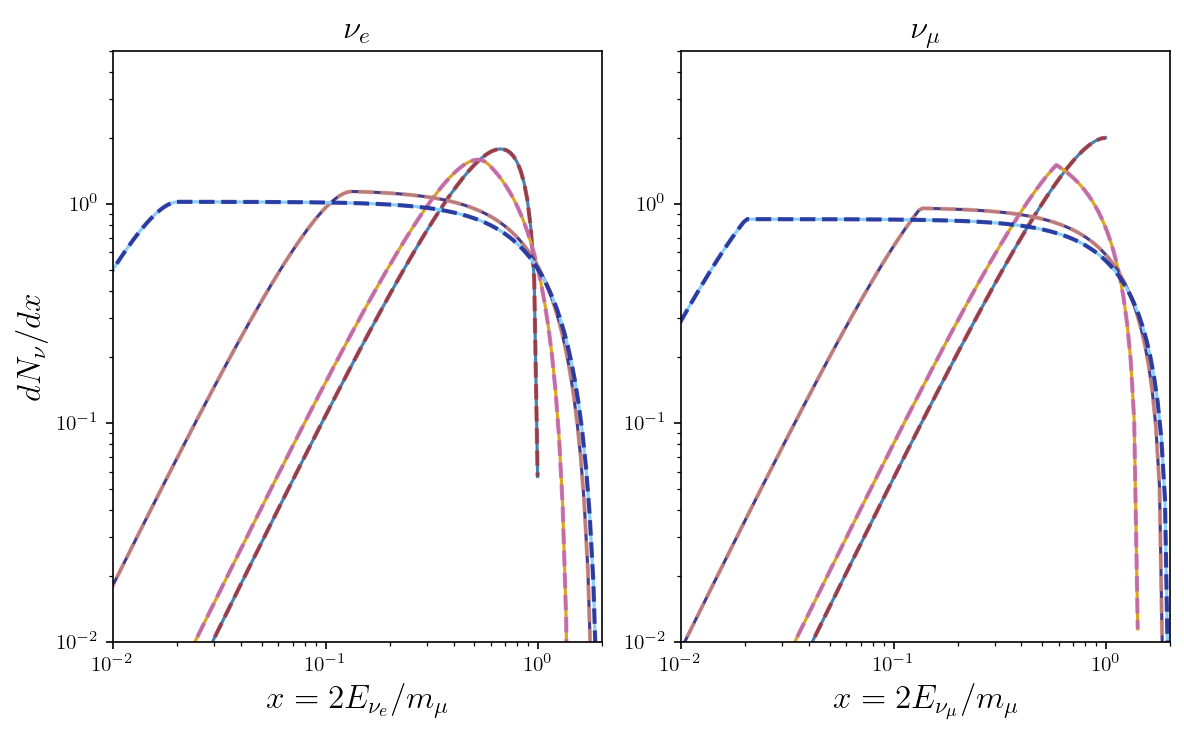

In [3]:
import sys
from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from matplotlib.lines import Line2D


# `hazma` built-in spectra
from hazma.neutrino_spectra import muon as hazma_dnde_muon_neutrino_spectrum

# Ratio of electron mass to muon mass
r: float = me / mmu

# Additional factor to muon width containing the electron mass
electron_mass_factor: float = 1.0 - 8 * r**2 + 8.0 * r**6 - r**8 - 12.0 * r**4 * np.log(r**2)

def dndx_muon_neutrino_spectrum(x, emu):
    g = emu / mmu
    b = np.sqrt(1.0 - (mmu / emu)**2)

    
    temp1 = g**2
    temp2 = -1 + b
    temp3 = r**4


    if emu - mmu < sys.float_info.epsilon:
        return dndx_muon_neutrino_spectrum_rest_frame(xs)


    if isinstance(x, np.ndarray):
        wp = np.where(
            x < (1-r**2) * (1 - b),
            1 + b,
            (1 -r**2) / (g**2 * x)
        )
        res = np.zeros((2, len(x)), dtype=np.float_)
    else:
        if x < (1-r**2) * (1 - b):
            wp = 1 + b
        else:
            wp = (1-r**2) / (g**2 * x)
        res = [0.0, 0.0]

    tempm1 = g**2
    tempm2 = r**4
    tempm3 = tempm1*wp*x
    tempm4 = -1 + tempm3
    tempm5 = tempm4**(-2)
    tempm6 = r**2
    tempm7 = 3 + tempm6
    tempm8 = -1 + b
    tempm9 = tempm1*tempm8*x
    tempm10 = 1 + tempm9

    pre = 1 / (b * electron_mass_factor)

    res[0] = pre * (-(
        temp1*x*(
            6*temp3 
            + temp1*x*(2*temp1*wp**2*x + wp*(-3 - 2*temp1*temp2*x) + temp2*(3 + 2*temp1*temp2*x)) 
            + 6*r**2*temp1*x*(1 + wp - b))*(-1 + wp + b)) 
            + 6*temp3*np.log((1 + temp1*temp2*x)/(1 - temp1*wp*x))
    ) 
    res[1] = (1.0 / (6.0 * electron_mass_factor * b)) * (
        6*tempm1*tempm2*tempm5*tempm7*wp*x 
        - 4*g**6*(tempm8**3 + wp**3)*x**3 
        + 6*tempm2*(-3*tempm5 + (3 + tempm1*tempm7*tempm8*x)/tempm10**2) 
        - 9*g**4*(-1 + tempm6)*x**2*(1 + wp - b)*(-1 + wp + b) 
        - 6*tempm2*(-3 + tempm6)*np.log(tempm10/(1 - tempm1*wp*x))
    )

    return np.array(res)

emus = mmu * np.array([1.0, 1.1, 2.0, 5.0])
xxs = []
dndxs = []
hazma_dndxs = []

for i, emu in enumerate(emus):
    beta = np.sqrt(1.0 - (mmu / emu)**2)
    xs = np.geomspace(1e-4, (1-r)*(1+beta), 250)
    jac = emu / 2.0
    xxs.append(xs)
    dndxs.append(dndx_muon_neutrino_spectrum(xs, emu))
    hazma_dndxs.append(jac * hazma_dnde_muon_neutrino_spectrum(jac * xs, emu))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(8,5))

for xs, dndx, hdndx in zip(xxs, dndxs, hazma_dndxs):
    ax1.plot(xs, dndx[0])
    ax1.plot(xs, hdndx[0], ls="--", alpha=0.7, lw=2)

    ax2.plot(xs, dndx[1])
    ax2.plot(xs, hdndx[1], ls="--", alpha=0.7, lw=2)

handles = [
    Line2D([],[], lw=1, ls="-", color="k", label="this notebook"),
    Line2D([],[], lw=2, ls="--", color="k", alpha=0.7, label="hazma"),
]

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlim(1e-2, 2.0)
ax1.set_ylim(1e-2, 5.0)
ax1.set_ylabel(r"$dN_{\nu}/dx$", fontdict={"size": 16})
ax1.set_xlabel(r"$x = 2 E_{\nu_{e}}/m_{\mu}$", fontdict={"size": 16})
ax1.set_title(r"$\nu_{e}$", fontsize=16)

ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlim(1e-2, 2.0)
ax2.set_ylim(1e-2, 5.0)
ax2.set_xlabel(r"$x = 2 E_{\nu_{\mu}}/m_{\mu}$", fontdict={"size": 16})
ax2.set_title(r"$\nu_{\mu}$", fontsize=16)


# ax1.legend(handles=handles)
plt.tight_layout()

## Charged Pion

The charged pion has two decay modes relevant to the neutrino spectra: a dominant mode $\pi^{\pm} \to \mu^{\pm} + \nu_{\mu}$ 
and a chirality supressed mode $\pi^{\pm} \to e^{\pm} + \nu_{e}$. The prompt neutrin emmission with yeild a $\delta$-function
in the neutrino spectrum while the the decay of the muon will yield additional contributions to the spectrum. For the muon
decay mode, the muon spectrum in the charged-pion rest frame is:
\begin{align*}
    \frac{dN}{dE_{\nu_{\mu}}} = \mathrm{BR}(\pi^{\pm} \to \mu^{\pm} + \nu_{\mu})\left[ \delta(E_{\nu_{\mu}} - E^{0}_{\nu_{\mu}}) 
    + \frac{dN_{\mu\to e\nu_{e}\nu_{\mu}}}{dE_{\nu_{\mu}}}\right]
\end{align*}
and the electron-neutrino spectrum is
\begin{align*}
    \frac{dN}{dE_{\nu_{e}}} = 
    \mathrm{BR}(\pi^{\pm} \to e^{\pm} + \nu_{e})\delta(E_{\nu_{e}} - E^{0}_{\nu_{e}}) 
    + \mathrm{BR}(\pi^{\pm} \to \mu^{\pm} + \nu_{\mu})
    \frac{dN_{\mu\to e\nu_{e}\nu_{\mu}}}{dE_{\nu_{e}}}
\end{align*}
Boosted the charged pion spectrum requires employing the same integrations shown above. We need to do the boost of the muon decay
spectrum numerically. However, we can boost the $\delta$-function contributions analytically. The boost of a $\delta$-function
yeilds:
\begin{align*}
    \frac{dN}{dE}
    = \int_{-1}^{1}\frac{dz}{2\gamma (1-\beta z)}\delta(\gamma E (1-\beta z) - E_{0})
    = \frac{1}{2\gamma\beta E_{0}} \left[\theta(E - E_{-}) - \theta(E - E_{+})\right]
\end{align*}
where $E_{\pm} = \gamma E_{0}(1\pm\beta)$.

In [8]:
from scipy.integrate import quad
from hazma.parameters import charged_pion_mass as mpi
from hazma.parameters import muon_mass as mmu
from hazma.parameters import electron_mass as me
from hazma.neutrino_spectra import muon as hazma_dnde_muon_neutrino_spectrum
from hazma.neutrino_spectra import charged_pion as hazma_dnde_charged_pion_neutrino_spectrum

# BR(μ+, νμ) = (99.98770±0.00004) %
BR_PI_TO_MU_NUMU = 0.9998770  
# BR(e+, νe) = ( 1.230±0.004  )×10−4
BR_PI_TO_E_NUE = 1.230e-4


def dndx_charged_pion_neutrino_spectrum(x, epi):
    g = epi / mpi
    b = np.sqrt(1.0 - (mpi/ epi)**2)
    enu = x * epi / 2.0

    enue_rf = (mpi**2 - me**2) / (2 * mpi)
    enue_plus = g * enue_rf * (1 + b)
    enue_minus = g * enue_rf * (1 - b)

    enum_rf = (mpi**2 - mmu**2) / (2 * mpi)
    emu_rf = (mpi**2 + mmu**2) / (2 * mpi)
    enum_plus = g * enum_rf * (1 + b)
    enum_minus = g * enum_rf * (1 - b)

    def integrand(z, e, gen):
        erf = g * e * (1 - beta * z)
        jac = 1.0 / (2.0 * g * (1 - beta * z))
        res = hazma_dnde_muon_neutrino_spectrum(erf, emu_rf)
        return jac * (res[0] if gen ==0 else res[1])
    
    if isinstance(enu, np.ndarray):
        res = np.zeros((2, len(enu)), dtype=np.float_)
        # Delta-function contributions
        res[0] = np.where(np.logical_and(enu < enue_plus, enu > enue_minus),
            BR_PI_TO_E_NUE / (2.0 * g * b * enue_rf), 0.0)
        res[1] = np.where(np.logical_and(enu < enum_plus, enu > enum_minus),
            BR_PI_TO_MU_NUMU / (2.0 * g * b * enum_rf), 0.0)
        # boosted muon contriubtion
        res[0] += BR_PI_TO_MU_NUMU * np.array([quad(integrand, -1.0, 1.0, args=(e, 0))[0] for e in enu])
        res[1] += BR_PI_TO_MU_NUMU * np.array([quad(integrand, -1.0, 1.0, args=(e, 1))[0] for e in enu])
    else:
        res = np.array([0.0, 0.0])
        # Delta-function contributions
        if enu < enue_plus and enu > enue_minus:
            res[0] = BR_PI_TO_E_NUE / (2.0 * g * b * enue_rf)
        if enu < enum_plus and enu > enum_minus:
            res[1] = BR_PI_TO_MU_NUMU / (2.0 * g * b * enum_rf)
        # boosted muon contriubtion
        res[0] += BR_PI_TO_MU_NUMU * quad(integrand, -1.0, 1.0, args=(enu, 0))[0]
        res[1] += BR_PI_TO_MU_NUMU * quad(integrand, -1.0, 1.0, args=(enu, 1))[0]

    return epi / 2.0 * res

/tmp/ipykernel_89196/2543185506.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  1.0 / (2.0 * g * b * enue_rf), 0.0)
/tmp/ipykernel_89196/2543185506.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  1.0 / (2.0 * g * b * enum_rf), 0.0)


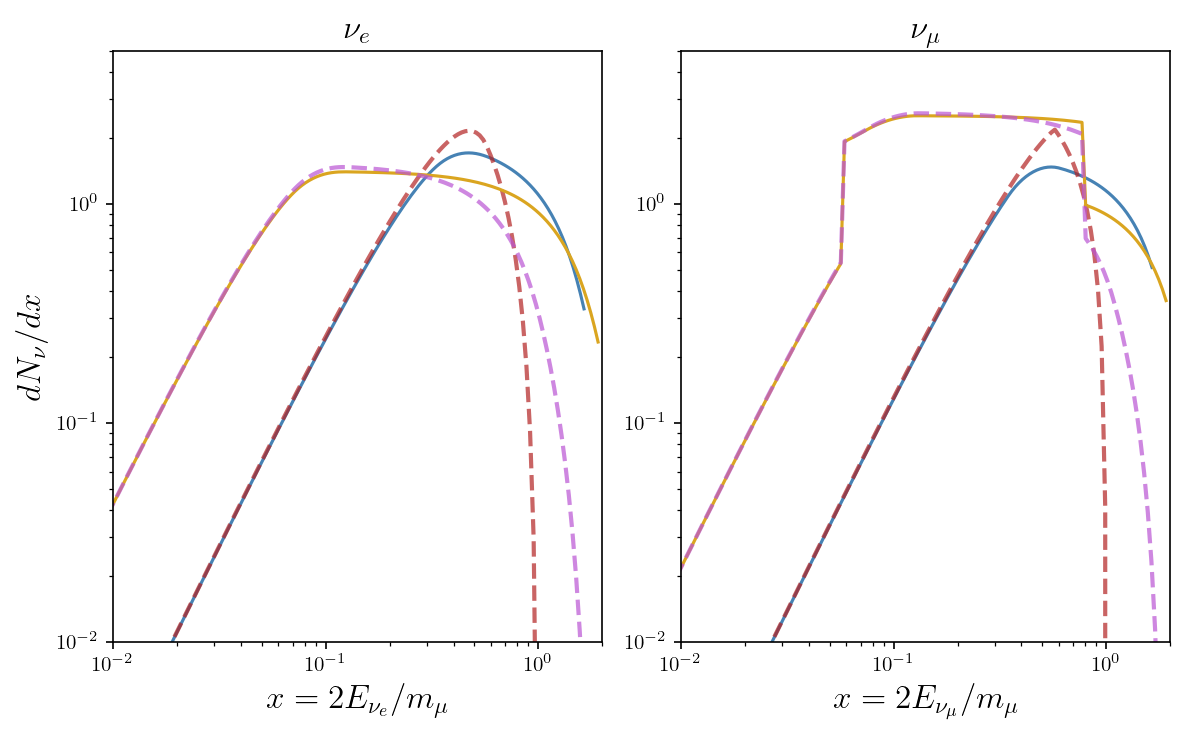

In [9]:
epis = mpi * np.array([1.0, 2.0])
xxs = []
dndxs = []
hazma_dndxs = []

for i, epi in enumerate(epis):
    beta = np.sqrt(1.0 - (mmu / epi)**2)
    xs = np.geomspace(1e-4, (1-r)*(1+beta), 250)
    jac = epi / 2.0
    xxs.append(xs)
    dndxs.append(dndx_charged_pion_neutrino_spectrum(xs, epi))
    hazma_dndxs.append(jac * hazma_dnde_charged_pion_neutrino_spectrum(jac * xs, epi))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(8,5))

for xs, dndx, hdndx in zip(xxs, dndxs, hazma_dndxs):
    ax1.plot(xs, dndx[0])
    ax1.plot(xs, hdndx[0], ls="--", alpha=0.7, lw=2)

    ax2.plot(xs, dndx[1])
    ax2.plot(xs, hdndx[1], ls="--", alpha=0.7, lw=2)

handles = [
    Line2D([],[], lw=1, ls="-", color="k", label="this notebook"),
    Line2D([],[], lw=2, ls="--", color="k", alpha=0.7, label="hazma"),
]

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlim(1e-2, 2.0)
ax1.set_ylim(1e-2, 5.0)
ax1.set_ylabel(r"$dN_{\nu}/dx$", fontdict={"size": 16})
ax1.set_xlabel(r"$x = 2 E_{\nu_{e}}/m_{\mu}$", fontdict={"size": 16})
ax1.set_title(r"$\nu_{e}$", fontsize=16)

ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlim(1e-2, 2.0)
ax2.set_ylim(1e-2, 5.0)
ax2.set_xlabel(r"$x = 2 E_{\nu_{\mu}}/m_{\mu}$", fontdict={"size": 16})
ax2.set_title(r"$\nu_{\mu}$", fontsize=16)


# ax1.legend(handles=handles)
plt.tight_layout()